20 days' covariance matrix is completed!  Its shape is (947L, 947L)
70 days' covariance matrix is completed!  Its shape is (947L, 947L)
120 days' covariance matrix is completed!  Its shape is (947L, 947L)
170 days' covariance matrix is completed!  Its shape is (947L, 947L)
220 days' covariance matrix is completed!  Its shape is (947L, 947L)
270 days' covariance matrix is completed!  Its shape is (947L, 947L)
320 days' covariance matrix is completed!  Its shape is (947L, 947L)
370 days' covariance matrix is completed!  Its shape is (947L, 947L)
420 days' covariance matrix is completed!  Its shape is (947L, 947L)
470 days' covariance matrix is completed!  Its shape is (947L, 947L)


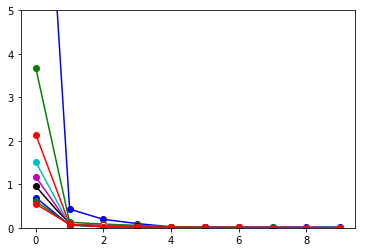

In [12]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import time
import pylab as pl
df = pd.read_table("data.dat",sep=" ",header=None)
df = df.drop(504, 1)
for i in range(10):
    df=df.fillna(axis=1, method='ffill')
df=df.fillna(df.mean(axis=1))

def findMaxEigen(cov,eps=0.01,negative_eigen=False):
    if negative_eigen==False:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=norm(tempv)/norm(vector)
        return eigenvalue,vector
    else:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        mark=+1
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            if norm(tempv+vector)<eps:
                vector=tempv
                mark=-1
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=mark*norm(tempv)/norm(vector)
        return eigenvalue,vector

VV=[]
VE=[]
SS=10                   # How many eigenvalues we need for
GAP=50                 # How long time gap we set
TT=len(range(20,503,GAP))# How many time points we select

for MMM in range(20,503,GAP):
    mdf = df[range(MMM)]
    data=np.array(mdf)
    LL,CC=data.shape
    predata=(data[:,1:CC]-data[:,0:CC-1])/data[:,0:CC-1] # the returns
    rdata=predata-(predata.mean(axis=1))[:,np.newaxis]   # demean
    cov=np.matmul(rdata,rdata.transpose())/(CC-1)        # covariance matrix
    print MMM,"""days' covariance matrix is completed!  Its shape is""",cov.shape
    mcov=np.copy(cov)
    count=0
    for count in range(SS):
        value,vector=findMaxEigen(mcov)
        VV.append(value)
        VE.append(vector)
        mcov=mcov-value*np.matmul(vector,vector.transpose())

YYY=(np.array(VV)).reshape(TT,SS)
color_set=["bo-","go-","ro-","co-","mo-","ko-","wo-",]*10
count=0
for YY in YYY:
    pl.plot(range(len(YY)),np.abs(YY),color_set[count])
    count+=1
pl.ylim(0,5)
pl.show()